<a href="https://colab.research.google.com/github/Tiziri-k/SIC-exercices/blob/master/NLP%20%26%20TensorFlow/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [92]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.

#### Answer the following question by providing Python code:

In [93]:
# Bring the data.
housing_data = fetch_california_housing()

In [94]:
housing_data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [58]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [59]:
housing_data['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [60]:
# so we have Number of Attributes: 8 numeric (features)

In [61]:
housing_data['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [95]:
# target
y =  pd.DataFrame(housing_data.target,columns=['Home price'])
y

,Home price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [96]:
x = pd.DataFrame(housing_data['data'],columns=housing_data['feature_names'])

In [97]:
df = pd.concat([x,y], axis=1)

In [98]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Home price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

#***Preprocess*** the data 

In [66]:
x.shape , y.shape

((20640, 8), (20640, 1))

In [67]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Home price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Home price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [69]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Home price    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3eacc4fbd0>,
      dtype=object)

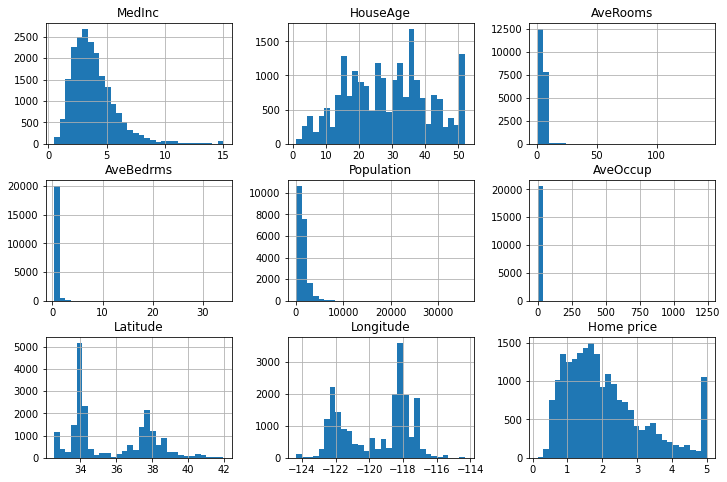

In [70]:
df.hist(bins=30, figsize=(12,8))

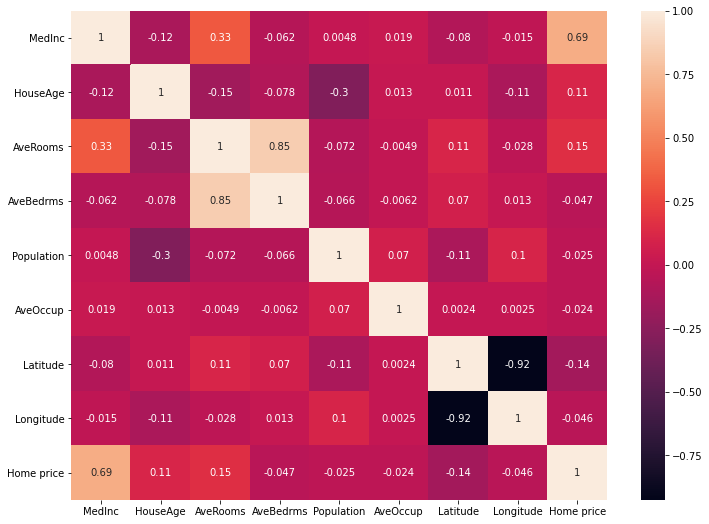

In [71]:
import seaborn as sns
plt.figure(figsize=(12,9))
sns.heatmap(df.corr() , annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3eac9a5190>,
      dtype=object)

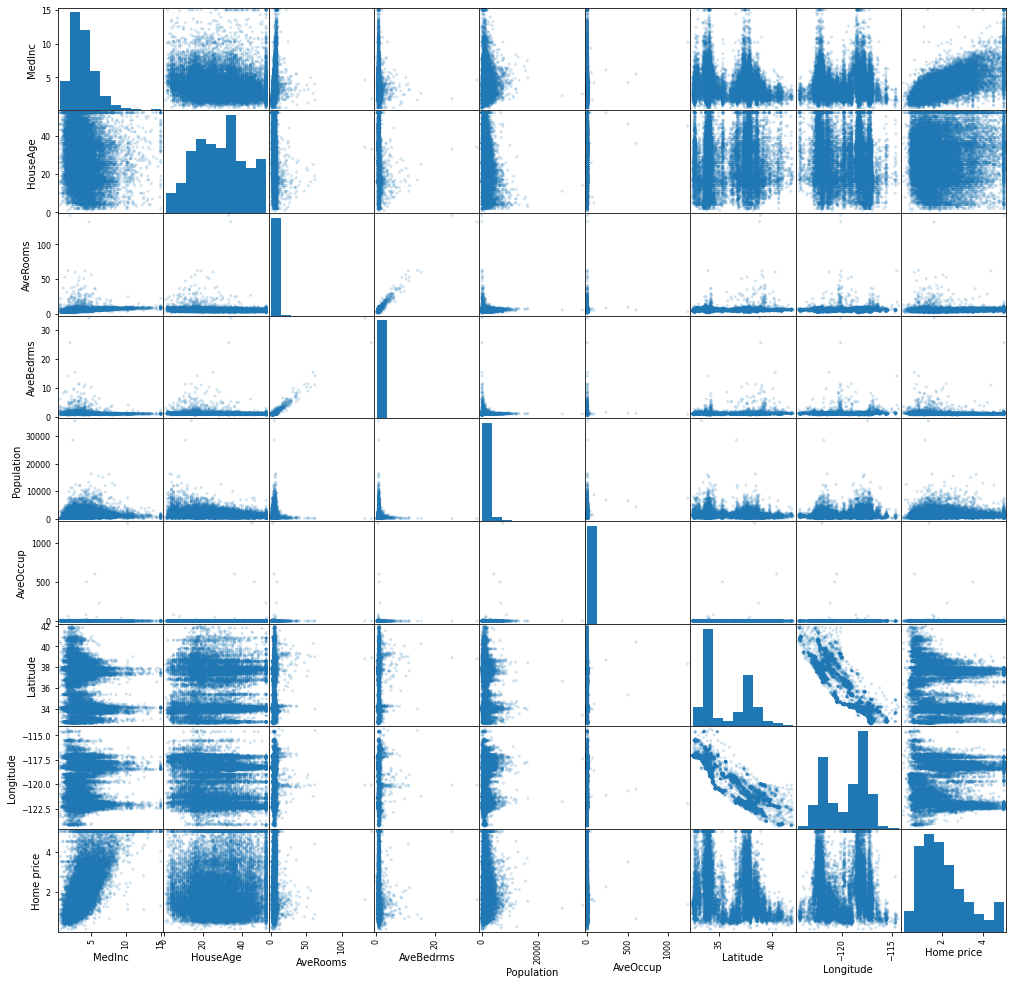

In [72]:
c = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(17, 17), diagonal='hist')
c


In [73]:
# after the EDA : As the feature of our model is MedInc

# **Scaler data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the data

x = pd.DataFrame(scaler.fit_transform(x))
y = pd.DataFrame(scaler.fit_transform(y))

In [75]:
# feature :
X = x[0]  # MedInc        
X

0        2.344766
1        2.332238
2        1.782699
3        0.932968
4       -0.012881
           ...   
20635   -1.216128
20636   -0.691593
20637   -1.142593
20638   -1.054583
20639   -0.780129
Name: 0, Length: 20640, dtype: float64

In [76]:
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=SEED)


# **Linear regression**

In [99]:
tf.compat.v1.disable_eager_execution()


In [100]:
b1 = tf.Variable(1.0)                
b0 = tf.Variable(1.0)

In [101]:
X_ph = tf.compat.v1.placeholder(tf.float32, shape=(None))             
y_ph = tf.compat.v1.placeholder(tf.float32, shape=(None))

In [102]:
y_model = b0 + b1*X_ph      

In [103]:
loss = tf.reduce_mean(tf.square(y_ph - y_model)) 

In [107]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)


In [ ]:
n_epochs = 4000                                              
train = optimizer.minimize(loss)                                 
init = tf.compat.v1.global_variables_initializer()                

with  tf.compat.v1.Session() as sess:
        # Variables initialization.
        sess.run(init)
        # Training.
        my_feed = {X_ph:X_train, y_ph:y_train}                        
        for i in range(n_epochs):
            sess.run(train, feed_dict = my_feed)
        #b0_model, b1_model = sess.run([b0, b1])                 
        # Testing.
        my_feed = {X_ph:X_test, y_ph:y_test}  
        correct_predictions = tf.compat.v1.equal(tf.compat.v1.argmax(y_model, axis=0), tf.argmax(y_model, axis=0))          # In argmax(), axis=1 means horizontal direction.
        accuracy = tf.reduce_mean(tf.compat.v1.cast(correct_predictions, tf.float32)) 
        mse_value = sess.run(accuracy, feed_dict = my_feed)       

In [123]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))

MSE  = 1.000
RMSE = 1.000
